## Extract and Remove Value/Unit from catalog_content
This cell extracts the Value and Unit from the end of `catalog_content`, creates two new columns, and then strips these details from the original text.

# Import Libraries and Create Directories

In [86]:
# Install PyTorch if not already installed
# paste this in terminal:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126
# !pip install scikit-learn

In [31]:
# !pip install pandas numpy matplotlib jupyterlab ipywidgets

In [1]:
import os
import pandas as pd
import numpy as np
from IPython import display
from urllib.parse import urlparse, unquote
import re
import torch
from pathlib import Path
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)

In [2]:
# projects_dir_path = os.path.join(os.getcwd(), "projects")
# # os.makedirs(projects_dir_path, exist_ok=True)
# price_predict_project_path = os.path.join(projects_dir_path, "price_predict")
# os.makedirs(price_predict_project_path, exist_ok=True)
# os.chdir(price_predict_project_path)

move the csv files into the 'dataset' directory after creating it

In [3]:
# put your own directory path where the dataset is located
os.chdir(r'C:\Users\alvin\Desktop\projects\price_predict\dataset')

In [4]:
# check if the directories are created successfully
os.listdir()

['images', 'sample_test.csv', 'sample_test_out.csv', 'test.csv', 'train.csv']

In [5]:
# datasets_dir_path = os.path.join(price_predict_project_path, "dataset")
# os.chdir(datasets_dir_path)
# os.listdir()

In [65]:
# load the training data
train_df = pd.read_csv("train.csv")
train_df.sample(1)

,sample_id,catalog_content,image_link,price
40038,224259,Item Name: NY Spice Shop Assorted Fruit Flavored Jawbreakers - Wrapped - 1 Pound\nBullet Point: Assorted Fruit Flavored Jawbreakers - Wrapped\nProduct Description: Assorted Fruit Flavored Jawbreakers - Wrapped\nValue: 16.0\nUnit: Ounce\n,https://m.media-amazon.com/images/I/61vry42cBrL.jpg,8.95


# Check data quality

In [66]:
# Check for missing values
train_df.isnull().sum()

sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

In [67]:
# Remove 'Item Name: ' prefix from catalog_content
def remove_item_name_prefix(text):
    return text.strip().replace('Item Name:', '').strip()

extracted_df = train_df.copy()
extracted_df['catalog_content'] = extracted_df['catalog_content'].apply(remove_item_name_prefix)
extracted_df.sample(1)

,sample_id,catalog_content,image_link,price
70672,284368,"Weiman Cook Top Scrubbing Pads – Gently Clean and Remove Burned-on Food from All Smooth Top and Glass Cooktop Ranges, 3 reusable pads\nBullet Point 1: Reveal - Non-abrasive cooktop pads help easily remove heavily burned on foods, grease & grime.\nBullet Point 2: Revitalize - Cooktop pads make sure to clean with a gentle, yet effective touch & will not scratch.\nBullet Point 3: Shines - Dramatically cleans, shines and protects glass/ceramic/induction smooth top ranges.\nBullet Point 4: Safe - Leave a streak-free shine while removing splattered food, dirt, oily residue & watermarks.\nBullet Point 5: Use On - All major glass/ceramic cooktop manufactures including GE, Whirlpool, Frigidaire & Thermador\nBullet Point 6: Made in the USA & 100% Plastic\nValue: 3.0\nUnit: Count",https://m.media-amazon.com/images/I/71BbZl-IOuL.jpg,7.425


Every single record comes with values and units except for one, do a bit of Feature Engineering

In [68]:
# Extract "Value" and "Unit" from catalog_content into two new columns, then remove them from catalog_content
def extract_value_unit_and_strip(text):
    match = re.search(r'Value:\s*([^\n]+)\s*Unit:\s*([^\n]+)', text)
    if match:
        value = match.group(1).strip()
        unit = match.group(2).strip()
        # Remove the matched part from the text
        stripped = re.sub(r'Value:\s*[^\n]+\s*Unit:\s*[^\n]+', '', text).strip()
        return pd.Series([value, unit, stripped])
    else:
        return pd.Series([None, None, text])


extracted_df[['value', 'unit', 'catalog_content']] = extracted_df['catalog_content'].apply(extract_value_unit_and_strip)

In [69]:
extracted_df.sample(1)

,sample_id,catalog_content,image_link,price,value,unit
10171,179171,"O'Creme Silver Dragees Cake Decorating Supplies for Bakers: Cookie, Cupcake & Icing Toppings, Bright Metallic Sphere Sprinkles Decoration, Certified, Decorating Sugar Ball Accents - 6mm, 8 Oz\nBullet Point 1: 🎂 MAKE IT SPARKLE – Surprise your party guests with luxurious-looking desserts! Decorating your favorite confectionery with our bright metallic silver dragees spheres will surely elevate your presentation.\nBullet Point 2: 🎂 GREAT FOR MOST DESSERTS – Our dragees are classy for wedding and birthday cakes. But you can also use them to embellish cookies, cupcakes, ice cream, fondant and pastries for added pizzazz.\nBullet Point 3: 🎂 DECORATE MORE – Unlike other toppings, each pack of our cake supplies contains enough sparkling balls to adorn many treats. Bedeck more desserts with our silver metallic spheres.\nBullet Point 4: 🎂 CERTIFIED KOSHER – Not For Passover. Under strict kosher supervision of Beth Din Minchas Chinuch Tartikov. O'Creme silver dragees kashruth certification meets the most stringent kosher consumers requirements.\nBullet Point 5: 🎂 IMPORTANT - Please note that Dragees are classified as non-toxic but non-edible for decoration purposes only. Not for sale in the state of CA.\nProduct Description: <b>O'Creme Silver Dragees</b><br><br> Sugar balls used for decorating cakes, cupcakes,<br> cookies, ice cream, fondant and desserts.<br> Perfect for cakes at weddings and birthday parties.<br><br> <ol><b>Note:</b> <li>Non-toxic but not edible <li>Not for sale in California",https://m.media-amazon.com/images/I/81p0c9OQOAL.jpg,15.65,8.0,Ounce


In [70]:
# number of records share everything the same except for price
extracted_df[['catalog_content', 'image_link', 'value', 'unit']].duplicated().sum()

np.int64(46)

Some records share the same images, even though they are the same product, they have different quantities

In [71]:
# Get the columns we want to check
cols_to_check = ['catalog_content', 'image_link', 'value', 'unit']
# Create boolean mask of duplicated rows
duplicated_mask = extracted_df[cols_to_check].duplicated(keep=False)
# Filter the dataframe using the mask
dup_df = extracted_df[duplicated_mask].sort_values(by='image_link')
dup_df.sample(1)

,sample_id,catalog_content,image_link,price,value,unit
64462,48614,"ABSOLUTELY GLUTEN FREE FLATBREAD GF TSTD ONION, 5.29 OZ, PK- 12",https://m.media-amazon.com/images/I/61UU3-HsuML.jpg,72.41,1.0,Count


In [72]:
# Group by catalog_content and image_link, then aggregate
cleaned_df = dup_df.groupby(cols_to_check).agg({
    'sample_id': 'min',  # keep lowest sample_id
    'price': 'mean'      # take average of prices
}).reset_index()

# Show the first few rows to verify
# cleaned_df.sample(5)

# Print the reduction in records
print(f"Original records: {len(dup_df)}")
print(f"After deduplication: {len(cleaned_df)}")

Original records: 92
After deduplication: 46


In [73]:
train_df[train_df['sample_id'] == 295651]

,sample_id,catalog_content,image_link,price
48264,295651,Item Name: -\nValue: 1.0\nUnit: 1\n,https://m.media-amazon.com/images/I/31usjUxytWL.jpg,35.99


# Download and Handle Images

In [15]:
images = train_df['image_link']
images.sample(5)

41570    https://m.media-amazon.com/images/I/61JiuRUlMbL.jpg
52195    https://m.media-amazon.com/images/I/7160Fdv2itL.jpg
5312     https://m.media-amazon.com/images/I/81gt3Q66a1L.jpg
70958    https://m.media-amazon.com/images/I/71EAscQ-98S.jpg
52674    https://m.media-amazon.com/images/I/81EMIJIVPtL.jpg
Name: image_link, dtype: object

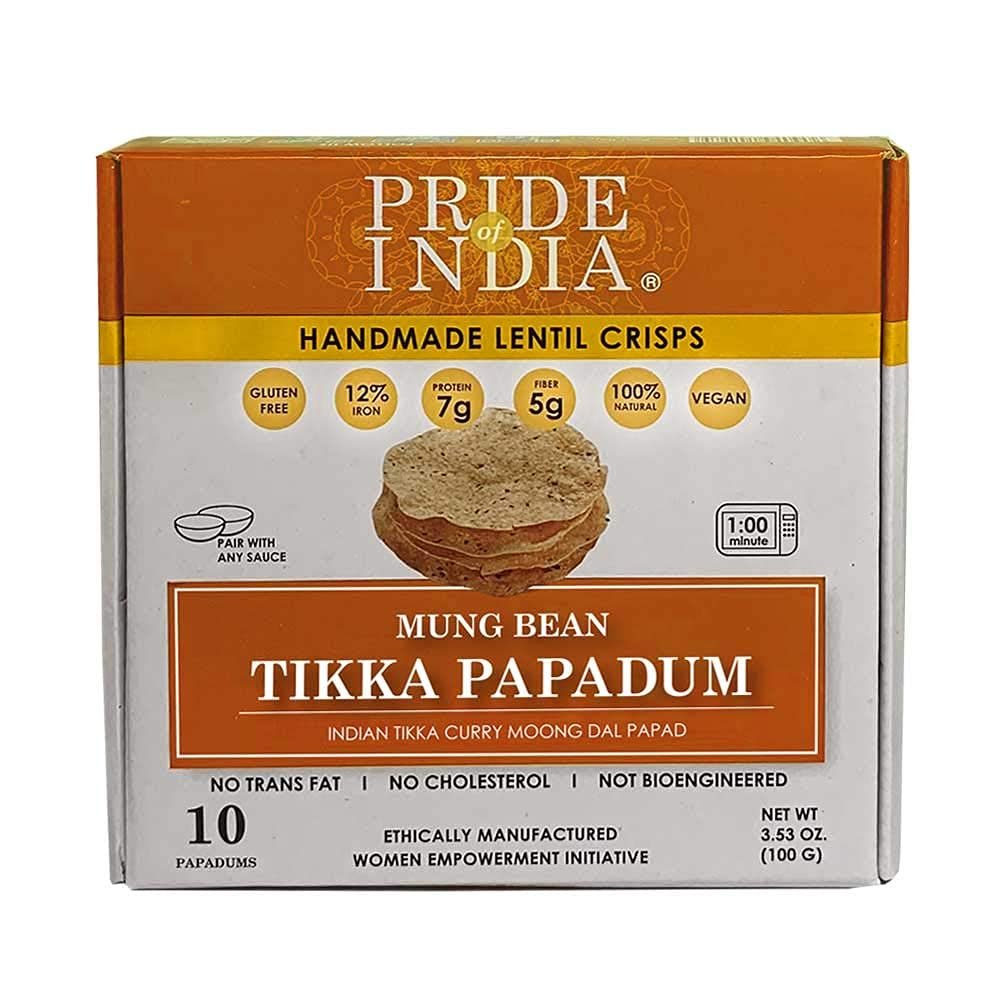

In [16]:
# Get a single image URL
test_image = images.sample(1).iloc[0] # use iloc because sample returns a Series
# test_image = images.sample(1)
display.Image(test_image, width=300, height=200)
# display.Image()

In [17]:
print(test_image)

https://m.media-amazon.com/images/I/61b3hePTP1S.jpg


## Downloading Images

In [18]:
# # functions provided by Kaggle to download images
# import re
# import os
# import pandas as pd
# import multiprocessing
# from time import time as timer
# from tqdm import tqdm
# import numpy as np
# from pathlib import Path
# from functools import partial
# import requests
# import urllib
# # download single image
# def download_image(image_link, savefolder):
#     if(isinstance(image_link, str)):
#         filename = Path(image_link).name
#         image_save_path = os.path.join(savefolder, filename)
#         if(not os.path.exists(image_save_path)):
#             try:
#                 urllib.request.urlretrieve(image_link, image_save_path)    
#             except Exception as ex:
#                 print('Warning: Not able to download - {}\n{}'.format(image_link, ex))
#         else:
#             return
#     return
# # download multiple images in parallel
# def download_images(image_links, download_folder):
#     if not os.path.exists(download_folder):
#         os.makedirs(download_folder)
#     results = []
#     download_image_partial = partial(download_image, savefolder=download_folder)
#     with multiprocessing.Pool(50) as pool:
#         for result in tqdm(pool.imap(download_image_partial, image_links), total=len(image_links)):
#             results.append(result)
#         pool.close()
#         pool.join()

# Finalize the Dataset

In [19]:
os.listdir()

['images', 'sample_test.csv', 'sample_test_out.csv', 'test.csv', 'train.csv']

In [20]:
# images_dir_path = os.path.join(datasets_dir_path, "images")
# os.makedirs(images_dir_path, exist_ok=True)

In [21]:
# Multi-threading is somehow not working for my machine, downloading images one by one. Try the download_images function first and see if it works
# for image in images:
#     download_image(image, images_dir_path)

In [22]:
# number of images that are unable to be downloaded
len(images) - len(os.listdir("images"))

25604

In [23]:
# match each image path to the records on the dataframe
IM_DIR = Path("images")
all_paths = [p for p in IM_DIR.rglob("*")]
by_last15_fname = {}
by_last15_stem  = {}

for p in all_paths:
    fname = p.name.lower()           # e.g., abc...xyz.jpg
    stem  = p.stem.lower()           # abc...xyz
    by_last15_fname[fname[-15:]] = p
    by_last15_stem[stem[-15:]]   = p


def url_keys(url: str):
    base = Path(unquote(urlparse(url).path)).name.lower()
    return base[-15:], Path(base).stem.lower()[-15:]

def match_existing_path(url: str):
    last15_fname, last15_stem = url_keys(url)
    return (
        by_last15_fname.get(last15_fname)
        or by_last15_stem.get(last15_stem)
    )

cleaned_df["file_path_obj"] = cleaned_df["image_link"].map(match_existing_path)
cleaned_df["image_path"] = cleaned_df["file_path_obj"].map(lambda p: str(p) if p else None)

In [24]:
cleaned_df.sample(1)

,catalog_content,image_link,value,unit,sample_id,price,file_path_obj,image_path
56437,"Rani Swad Kacha Aam Candy 7oz (200g) Individually Wrapped ~ Indian Tasty Treats | Vegan | Gluten Friendly | NON-GMO | Indian Origin\nBullet Point 1: You'll LOVE our Swad Kacha Aam Candy by Rani Brand--Here's Why:\nBullet Point 2: 🍬Great Taste! This tasty Indian treat is a popular snack to kids and adult alike that is both 100% vegetarian and 100% delicious.\nBullet Point 3: 🍬Individually wrapped and packed in a no barrier Plastic Bag, let us tell you how convenient that is with these treats!\nBullet Point 4: 🍬Rani is a USA based company selling spices for over 40 years, buy with confidence!\nBullet Point 5: 🍬Net Wt. 7oz (200g), Authentic Indian Product (Product of India)\nProduct Description: Rani Candies are everyone's favorite around the family. Take a bite and lose yourself in childhood nostalgia. The candies are hard textured and kids love them. these sugar-based candies have a mounth-watering taste loved by kids and adults alike. the sweet, sour and fruity flavours explode in your mouth. Make all your celebration sweeter with these small jars of sweetness.",https://m.media-amazon.com/images/I/81UjkwXE3FL.jpg,7.0,Ounce,234280,8.99,None,None


In [25]:
# number of available images for training samples
available_count = cleaned_df["image_path"].notnull().sum()
available_count

np.int64(51852)

In [26]:
finalized_df = cleaned_df.drop(columns=["image_link", "file_path_obj"])[cleaned_df['file_path_obj'].notnull()][['sample_id', 'catalog_content', 'image_path', 'value', 'unit', 'price']]
finalized_df.reset_index(drop=True, inplace=True)
finalized_df.sample(1)

,sample_id,catalog_content,image_path,value,unit,price
45867,205879,"TRUE LIME Water Enhancer, Bulk Dispenser Pack, 0 Calorie Drink Mix Packets, Sugar Free Flavoring Powder, Water Flavo Made with Real Limes, 100 Count (Pack of 2)\nBullet Point 1: The information below is per-pack only\nBullet Point 2: TRUE LIME WATER ENHANCER: True lime makes it easy to add flavor to your daily water so you drink more throughout the day. Just add one real lime packet to any beverage you like, and enjoy the taste of real lime without the seeds, mess, or waste.\nBullet Point 3: 100 PACKETS: With our 100 pack of True Lime, you’ll always have the taste of fresh limes on hand. These individual packets of lime powder are ready to freshen up any drink or recipe! They’re perfect for gatherings, breakrooms, kitchens, and more!\nBullet Point 4: CLEAN SIMPLE INGREDIENTS: Simple ingredients make True Lime the perfect water enhancer. Made with only lime juice, lime oils, and citric acid, True Lime is made from real limes without any artificial flavors, colors, preservatives, or sugars.\nBullet Point 5: CONVENIENT & VERSATILE: True Lime is more than just a water enhancer. Use True Lime to substitute lime wedges or lime juice in drinks, baking, cooking, and even seasoning. Each True Lime packet is equal to one lime wedge!\nBullet Point 6: TRUE TO THE FRUIT: True Lime uses a patented recipe to crystalize lime juice into the ideal lime drink mix. True Citrus’ alternative to lime juice reduces mess and waste while still capturing the authentic taste of freshly squeezed limes.",images\91uvnx78sRL.jpg,5.64,Ounce,6.48


In [27]:
# Take care of missing values in 'value' and 'unit' columns
# ===== Minimal, no-frills cleaning (run once before training) =====
df = finalized_df.copy()

# price: numeric, drop non-finite, clamp to >= 0 for log1p
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[np.isfinite(df["price"])]
df["price"] = df["price"].clip(lower=0)

# value: numeric; NaNs will be imputed with TRAIN median *after* the split
if "value" in df.columns:
    df["value"] = pd.to_numeric(df["value"], errors="coerce")

# unit: replace None/NaN with "<UNK>" so categoricals are safe
if "unit" in df.columns:
    df["unit"] = df["unit"].astype("string").fillna("<UNK>")

# ---- split (same as before) ----
def split_3way(d, train_frac=0.70, val_frac=0.15, seed=42):
    d_ = d.sample(frac=1.0, random_state=seed).reset_index(drop=True)
    n=len(d_); n_tr=int(n*train_frac); n_va=int(n*val_frac)
    return d_.iloc[:n_tr].copy(), d_.iloc[n_tr:n_tr+n_va].copy(), d_.iloc[n_tr+n_va:].copy()

df_tr, df_va, df_te = split_3way(df, 0.70, 0.15, seed=42)

# value median from TRAIN only → apply to all splits
if "value" in df_tr.columns:
    med = df_tr["value"].median(skipna=True)
    df_tr["value"] = df_tr["value"].fillna(med)
    df_va["value"] = df_va["value"].fillna(med)
    df_te["value"] = df_te["value"].fillna(med)

print(
    "NaN counts after clean:",
    {"price": [df_tr["price"].isna().sum(), df_va["price"].isna().sum(), df_te["price"].isna().sum()],
     "value": ([df_tr["value"].isna().sum(), df_va["value"].isna().sum(), df_te["value"].isna().sum()] if "value" in df.columns else "n/a"),
     "unit":  ([df_tr["unit"].isna().sum(),  df_va["unit"].isna().sum(),  df_te["unit"].isna().sum()]  if "unit"  in df.columns else "n/a")}
)


NaN counts after clean: {'price': [np.int64(0), np.int64(0), np.int64(0)], 'value': [np.int64(0), np.int64(0), np.int64(0)], 'unit': [np.int64(0), np.int64(0), np.int64(0)]}


In [28]:
df.sample(1)

,sample_id,catalog_content,image_path,value,unit,price
43234,88416,"Southeastern Mills Roast Pork Gravy Mix, 4.2 Oz. Package (Pack of 4)",images\710SBW3VcnL.jpg,16.8,Ounce,21.99


In [93]:
# standardize the 'unit' column
# ===== Unit string standardization (no numeric conversion) =====
import re
import pandas as pd

df_std_units = df.copy()

def clean_text(s: str) -> str:
    s = s.lower()
    # replace punctuation with space, keep letters/numbers/underscore
    s = re.sub(r"[^\w\s]", " ", s)
    # collapse multiple spaces
    s = re.sub(r"\s+", " ", s).strip()
    return s

# Canonical mapping AFTER cleaning (keys are already lowercase & de-punctuated)
# Add/edit keys as you discover more variants.
CANON = {
    # count / each
    "count": "count",
    "ct": "count",
    "each": "count",
    "ea": "count",

    # ounce (weight)
    "oz": "ounce",
    "ounce": "ounce",
    "ounces": "ounce",

    # fluid ounce (volume)
    "fl oz": "fluid_ounce",
    "floz": "fluid_ounce",
    "fluid ounce": "fluid_ounce",
    "fluid ounces": "fluid_ounce",

    # pound
    "lb": "pound",
    "lbs": "pound",
    "pound": "pound",
    "pounds": "pound",

    # gram
    "g": "gram",
    "gram": "gram",
    "grams": "gram",
    "gramm": "gram",
    "gr": "gram",

    # kilogram
    "kg": "kilogram",
    "kilogram": "kilogram",
    "kilograms": "kilogram",

    # milliliter / millilitre
    "ml": "milliliter",
    "milliliter": "milliliter",
    "milliliters": "milliliter",
    "millilitre": "milliliter",
    "millilitres": "milliliter",

    # liter / litre
    "l": "liter",
    "liter": "liter",
    "liters": "liter",
    "litre": "liter",
    "litres": "liter",
    "ltr": "liter",

    # bottle(s)
    "bottle": "bottle",
    "bottles": "bottle",
    "per carton": "bottle",

    # bag(s)
    "bag": "bag",
    "bags": "bag",
    "ziplock bags": "bag",
    "ziplock bag": "bag",

    # package/pack
    "pack": "pack",
    "pk": "pack",
    "package": "pack",
    "packages": "pack",
    'paper cupcake liners': 'pack',
    'per package': 'pack',

    # length units (optional)
    "in": "inch",
    "inch": "inch",
    "inches": "inch",

    # generic fallback
    "unit": "count",
    "unità": "count",
    
    # incorrect extractions
    "24": "count",
    'none': '<unk>',
    "7 2 oz": "ounce",
}

def normalize_unit(u) -> str:
    if pd.isna(u) or u is None:
        return "<unk>"
    s = clean_text(str(u))
    if not s:
        return "<unk>"

    # First try direct match
    if s in CANON:
        return CANON[s]

    # Phrase heuristics (order matters: more specific first)
    # e.g., "fl oz 12" or "12 fl oz" → fluid_ounce (we only keep the canonical label)
    if "fl oz" in s or "fluid ounce" in s or "floz" in s:
        return "fluid_ounce"

    # plural → singular fallbacks
    if s.endswith("s") and s[:-1] in CANON:
        return CANON[s[:-1]]

    # common near-variants
    if s.replace(" ", "") in CANON:
        return CANON[s.replace(" ", "")]

    # last-resort: if it exactly equals a known base like "ounces" → ounce, "pounds" → pound, etc.
    plurals = {
        "ounces": "ounce", "pounds": "pound", "grams": "gram",
        "liters": "liter", "litres": "liter", "milliliters": "milliliter",
        "bottles": "bottle", "bags": "bag", "packages": "pack"
    }
    if s in plurals:
        return plurals[s]

    # unknown string, keep cleaned token to preserve information
    return s

# Show pre-standardization head
print("Top 20 raw unit values:")
print(df_std_units["unit"].value_counts(dropna=False).head(20))

# Apply normalization (string only; no numeric conversion)
df_std_units["unit_norm"] = df_std_units["unit"].apply(normalize_unit)

print("\nTop 30 normalized unit values:")
print(df_std_units["unit_norm"].value_counts().head(30))

# (Optional) replace original column
df_std_units["unit"] = df_std_units["unit_norm"]

# If you want to see how some specific variants mapped:
SAMPLES = ["Ounce","ounce","ounces","Oz","OZ","Fl Oz","Fl. Oz","fluid Ounce",
           "lb","pound","ct","COUNT","each","bottles","Ziplock bags","in","millilitre"]
probe = pd.Series(SAMPLES, name="sample")
probe_norm = probe.apply(normalize_unit)
print("\nSample normalization:")
print(pd.DataFrame({"raw": probe, "norm": probe_norm}))


Top 20 raw unit values:
unit
Ounce          28253
Count          12128
Fl Oz           7683
ounce           1345
None             659
oz               656
count            539
pound            104
fl oz             98
Oz                53
Pound             30
ct                26
Fluid Ounce       23
FL Oz             21
OZ                19
lb                16
Fl. Oz            16
gram              13
Gram              11
ounces            10
Name: count, dtype: Int64

Top 30 normalized unit values:
unit_norm
ounce             30340
count             12718
fluid_ounce        7870
<unk>               661
pound               154
gram                 33
pack                 16
milliliter           12
bottle                9
bag                   7
kilogram              5
liter                 4
k cups                3
jar                   3
can                   3
piece                 2
tea bags              2
foot                  1
1                     1
pouch                 1
mil

In [96]:
df_std_units[df_std_units.unit == '1']

,sample_id,catalog_content,image_path,value,unit,price,unit_norm
41,295651,-,images\31usjUxytWL.jpg,1.0,1,35.99,1


In [95]:
df_std_units.unit.value_counts().head(20)

unit
ounce          30340
count          12718
fluid_ounce     7870
<unk>            661
pound            154
gram              33
pack              16
milliliter        12
bottle             9
bag                7
kilogram           5
liter              4
k cups             3
jar                3
can                3
piece              2
tea bags           2
foot               1
1                  1
pouch              1
Name: count, dtype: int64

# Models

In [60]:
# ======= RESNET-18 — WINDOWS-SAFE, NO-CACHE, 1 EPOCH (channels_last FIX) =======
# Needs: finalized_df with ['image_path','price']

import os, time, random, numpy as np, pandas as pd, contextlib
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchvision.models import resnet18, ResNet18_Weights
from PIL import UnidentifiedImageError

# AMP import (version-safe)
try:
    from torch.cuda.amp import GradScaler, autocast   # legacy API
    def autocast_ctx(device): 
        return autocast() if device=="cuda" else contextlib.nullcontext()
except Exception:
    from torch.amp import GradScaler, autocast         # new API
    def autocast_ctx(device):
        return autocast(device_type="cuda", dtype=torch.float16) if device=="cuda" else contextlib.nullcontext()

# ---------------- CONFIG ----------------
IMAGES_ROOT   = ""   # set if paths are relative
IMG_SIZE      = 224
BATCH_SIZE    = 192
NUM_WORKERS   = 0
EPOCHS        = 1
LR            = 1e-3
WEIGHT_DECAY  = 5e-4
USE_LOG_PRICE = True
SEED          = 42

# ---------------- SETUP ----------------
torch.manual_seed(SEED); random.seed(SEED); np.random.seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True
with contextlib.suppress(Exception): torch.backends.cuda.matmul.allow_tf32 = True
with contextlib.suppress(Exception): torch.backends.cudnn.allow_tf32 = True
with contextlib.suppress(Exception): torch.set_float32_matmul_precision("high")
print("Device:", device)

assert {"image_path","price"}.issubset(finalized_df.columns)

# ---------------- TRANSFORMS ----------------
IMAGENET_MEAN=(0.485,0.456,0.406); IMAGENET_STD=(0.229,0.224,0.225)
try:
    tf = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    ])
except TypeError:
    tf = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    ])

# ---------------- DATASET ----------------
class PriceDataset(Dataset):
    def __init__(self, df, root="", use_log=True):
        self.df = df.reset_index(drop=True).copy()
        self.use_log = use_log
        if root:
            root = os.path.abspath(root)
            self.paths = [os.path.normpath(os.path.join(root, p)) for p in self.df["image_path"]]
        else:
            self.paths = [os.path.normpath(p) for p in self.df["image_path"]]

    def __len__(self): return len(self.paths)

    def __getitem__(self, i):
        price = float(self.df.iloc[i]["price"])
        path  = self.paths[i]
        try:
            x = read_image(path)                      # 3D tensor: CxHxW
            if x.size(0)==1: x = x.expand(3, *x.shape[1:])
            x = tf(x)                                 # still 3D here
        except (FileNotFoundError, UnidentifiedImageError, RuntimeError):
            x = torch.zeros(3, IMG_SIZE, IMG_SIZE, dtype=torch.float32)
        y = torch.tensor([price], dtype=torch.float32)
        if USE_LOG_PRICE: y = torch.log1p(y)
        return x, y, torch.tensor([price], dtype=torch.float32)

# ---------------- SPLIT & LOADERS ----------------
def split_3way(df, train_frac=0.70, val_frac=0.15, seed=42):
    df_ = df.sample(frac=1.0, random_state=seed).reset_index(drop=True)
    n=len(df_); n_tr=int(n*train_frac); n_va=int(n*val_frac)
    return df_.iloc[:n_tr].copy(), df_.iloc[n_tr:n_tr+n_va].copy(), df_.iloc[n_tr+n_va:].copy()

df_tr, df_va, df_te = split_3way(finalized_df, 0.70, 0.15, SEED)
print(f"Split sizes -> train {len(df_tr)} | val {len(df_va)} | test {len(df_te)}")

ds_tr = PriceDataset(df_tr, IMAGES_ROOT, USE_LOG_PRICE)
ds_va = PriceDataset(df_va, IMAGES_ROOT, USE_LOG_PRICE)

dl_tr = DataLoader(ds_tr, batch_size=BATCH_SIZE, shuffle=True,
                   num_workers=NUM_WORKERS, pin_memory=True)
dl_va = DataLoader(ds_va, batch_size=BATCH_SIZE, shuffle=False,
                   num_workers=NUM_WORKERS, pin_memory=True)

# ---------------- MODEL ----------------
m = resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
m.fc = nn.Linear(m.fc.in_features, 1).to(device)
if device=="cuda":
    m = m.to(memory_format=torch.channels_last)      # model in channels_last is fine

opt = torch.optim.AdamW(m.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
loss_fn = nn.HuberLoss(delta=1.0) if USE_LOG_PRICE else nn.MSELoss()
scaler  = GradScaler(enabled=(device=="cuda"))

@torch.no_grad()
def smape(pred,true,eps=1e-8):
    num=2.0*torch.abs(pred-true); den=torch.abs(pred)+torch.abs(true)+eps
    return torch.mean(num/den).item()*100.0
@torch.no_grad()
def mae(pred,true): return torch.mean(torch.abs(pred-true)).item()

# ---------------- SMOKE TEST (3 batches) ----------------
print("Smoke test (3 batches)…")
m.train(); seen=0; t0=time.time()
for bi, (xb, yb, _) in enumerate(dl_tr, 1):
    # NOW xb is 4D (N,C,H,W) → safe to set channels_last
    xb = xb.to(device, non_blocking=True)
    if device=="cuda":
        xb = xb.contiguous(memory_format=torch.channels_last)
    yb = yb.to(device, non_blocking=True)

    t_m0 = time.time()
    with autocast_ctx(device):
        out = m(xb); loss = loss_fn(out, yb)
    opt.zero_grad(set_to_none=True)
    scaler.scale(loss).backward(); scaler.step(opt); scaler.update()
    t_model = (time.time()-t_m0)*1000
    seen += xb.size(0)
    print(f"batch {bi} | model {t_model:.1f} ms | cum {seen} imgs")
    if bi >= 3: break
print(f"Smoke test throughput ≈ {seen/(time.time()-t0):.1f} imgs/sec")

# ---------------- TRAIN (1 epoch) ----------------
t0 = time.time()
m.train(); seen=0; run_loss=0.0
for xb, yb, _ in dl_tr:
    xb = xb.to(device, non_blocking=True)
    if device=="cuda":
        xb = xb.contiguous(memory_format=torch.channels_last)  # set after batching
    yb = yb.to(device, non_blocking=True)

    with autocast_ctx(device):
        out = m(xb); loss = loss_fn(out, yb)
    opt.zero_grad(set_to_none=True)
    scaler.scale(loss).backward(); scaler.step(opt); scaler.update()
    run_loss += loss.item()*xb.size(0); seen += xb.size(0)
tr_loss = run_loss / max(1, seen)

# ---------------- VALIDATE ----------------
m.eval(); preds=[]; truths=[]
with torch.no_grad():
    for xb, _yt, y_lin in dl_va:
        xb = xb.to(device, non_blocking=True)
        if device=="cuda":
            xb = xb.contiguous(memory_format=torch.channels_last)
        with autocast_ctx(device):
            out = m(xb).squeeze(1).detach().cpu()
        preds.append(torch.expm1(out) if USE_LOG_PRICE else out)
        truths.append(y_lin.squeeze(1))
pred = torch.cat(preds); true = torch.cat(truths)

print(f"Epoch 01 | train_loss={tr_loss:.4f} | val_SMAPE={smape(pred,true):.2f}% | val_MAE={mae(pred,true):.4f} | {time.time()-t0:.1f}s")


Device: cuda
Split sizes -> train 36296 | val 7777 | test 7779
Smoke test (3 batches)…


C:\Users\alvin\AppData\Local\Temp\ipykernel_5128\3092166864.py:110: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler  = GradScaler(enabled=(device=="cuda"))
C:\Users\alvin\AppData\Local\Temp\ipykernel_5128\3092166864.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  return autocast() if device=="cuda" else contextlib.nullcontext()


batch 1 | model 1517.6 ms | cum 192 imgs
batch 2 | model 543.2 ms | cum 384 imgs
batch 3 | model 565.9 ms | cum 576 imgs
Smoke test throughput ≈ 52.8 imgs/sec
Epoch 01 | train_loss=0.3398 | val_SMAPE=67.04% | val_MAE=15.1581 | 728.5s


In [79]:
# ================= MULTIMODAL REGRESSION (IMAGE + value/unit + optional TEXT) =================
# What this does:
# - Cleans your DataFrame (price/value/unit) with minimal rules
# - Splits into train/val/test using TRAIN-only stats (impute + scale)
# - Uses ResNet-18 for images, small tower for value/unit, optional TF-IDF(+SVD) tower for catalog_content
# - Trains 1 epoch (AMP, channels_last, workers=0)

import os, time, random, contextlib, numpy as np, pandas as pd
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch.amp import autocast, GradScaler
from PIL import UnidentifiedImageError

# ---------------- Config ----------------
IMAGES_ROOT   = ""      # set folder if image_path is relative
IMG_SIZE      = 224
BATCH_SIZE    = 192
NUM_WORKERS   = 0       # Windows-safe; try 2 later if stable
EPOCHS        = 1
LR            = 1e-3
WEIGHT_DECAY  = 5e-4
USE_LOG_PRICE = True
SEED          = 42

USE_TEXT      = True    # set False to ignore catalog_content even if present
MAX_TFIDF     = 20000   # cap vocabulary
SVD_DIM       = 128     # dense text dim after SVD (compact & fast)

# ---------------- Setup ----------------
torch.manual_seed(SEED); random.seed(SEED); np.random.seed(SEED)
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.backends.cudnn.benchmark = True
with contextlib.suppress(Exception): torch.backends.cuda.matmul.allow_tf32 = True
with contextlib.suppress(Exception): torch.backends.cudnn.allow_tf32 = True
with contextlib.suppress(Exception): torch.set_float32_matmul_precision("high")
print("Device:", device, "| torch:", torch.__version__)

assert {"image_path","price"}.issubset(finalized_df.columns), "Need columns: image_path, price"

# ---------------- Minimal cleaning ----------------
df = finalized_df.copy()

# price: numeric, finite, clamp >=0 (for log1p)
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[np.isfinite(df["price"])]
df["price"] = df["price"].clip(lower=0)

# value: numeric (leave NaN for now; we'll impute with TRAIN median after split)
if "value" in df.columns:
    df["value"] = pd.to_numeric(df["value"], errors="coerce")

# unit: map None/NaN to "<UNK>"
if "unit" in df.columns:
    df["unit"] = df["unit"].astype("string").fillna("<UNK>")

# text: keep as string; fillna ""
HAS_TEXT = USE_TEXT and ("catalog_content" in df.columns)
if HAS_TEXT:
    df["catalog_content"] = df["catalog_content"].astype("string").fillna("")

# ---------------- Split ----------------
def split_3way(d, train_frac=0.70, val_frac=0.15, seed=42):
    d_ = d.sample(frac=1.0, random_state=seed).reset_index(drop=True)
    n=len(d_); n_tr=int(n*train_frac); n_va=int(n*val_frac)
    return d_.iloc[:n_tr].copy(), d_.iloc[n_tr:n_tr+n_va].copy(), d_.iloc[n_tr+n_va:].copy()

df_tr, df_va, df_te = split_3way(df, 0.70, 0.15, seed=SEED)
print(f"Split sizes -> train {len(df_tr)} | val {len(df_va)} | test {len(df_te)}")

# ---------------- TRAIN-only stats: value impute/scale, unit vocab, text vectorizer -------------
num_cols = [c for c in ["value"] if c in df_tr.columns]
cat_cols = [c for c in ["unit"] if c in df_tr.columns]

# value impute with TRAIN median
impute_vals = {}
for c in num_cols:
    med = df_tr[c].median(skipna=True)
    impute_vals[c] = med
    df_tr[c] = df_tr[c].fillna(med)
    df_va[c] = df_va[c].fillna(med)
    df_te[c] = df_te[c].fillna(med)

# TRAIN-only z-scale for value
scale_stats = {}
eps = 1e-6
for c in num_cols:
    mu = df_tr[c].mean()
    sd = df_tr[c].std(ddof=0)
    if sd <= 0 or not np.isfinite(sd): sd = eps
    scale_stats[c] = (mu, sd)
    df_tr[c] = (df_tr[c] - mu) / sd
    df_va[c] = (df_va[c] - mu) / sd
    df_te[c] = (df_te[c] - mu) / sd

# unit vocab (TRAIN only)
cat_maps = {}
cat_card = {}
for c in cat_cols:
    cats = pd.Categorical(df_tr[c].astype(str))
    vocab = ["<UNK>"] + list(cats.categories)
    cat_maps[c] = {tok:i for i,tok in enumerate(vocab)}
    cat_card[c] = len(vocab)

# text → TF-IDF(+SVD) on TRAIN only (optional)
text_train = text_val = text_test = None
TEXT_DIM = 0
if HAS_TEXT:
    try:
        from sklearn.feature_extraction.text import TfidfVectorizer
        from sklearn.decomposition import TruncatedSVD
        vec = TfidfVectorizer(max_features=MAX_TFIDF, ngram_range=(1,2), min_df=2)
        svd = TruncatedSVD(n_components=SVD_DIM, random_state=SEED)
        Xtr = vec.fit_transform(df_tr["catalog_content"])
        Xva = vec.transform(df_va["catalog_content"])
        Xte = vec.transform(df_te["catalog_content"])
        Xtr = svd.fit_transform(Xtr).astype("float32")
        Xva = svd.transform(Xva).astype("float32")
        Xte = svd.transform(Xte).astype("float32")
        text_train, text_val, text_test = Xtr, Xva, Xte
        TEXT_DIM = SVD_DIM
        print(f"Text branch: TF-IDF {MAX_TFIDF} → SVD {SVD_DIM} (dense)")
    except Exception as e:
        print("Text branch disabled (sklearn not available or failed):", e)
        HAS_TEXT = False
        TEXT_DIM = 0

# ---------------- Transforms ----------------
IMAGENET_MEAN=(0.485,0.456,0.406); IMAGENET_STD=(0.229,0.224,0.225)
try:
    tf = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE), antialias=True),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    ])
except TypeError:
    tf = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ConvertImageDtype(torch.float32),
        transforms.Normalize(IMAGENET_MEAN, IMAGENET_STD),
    ])

# ---------------- Dataset ----------------
class MultiModalDataset(Dataset):
    def __init__(self, df, root="", num_cols=None, cat_cols=None, cat_maps=None,
                 text_mat=None, use_log=True):
        self.df = df.reset_index(drop=True).copy()
        self.use_log = use_log
        self.num_cols = num_cols or []
        self.cat_cols = cat_cols or []
        self.cat_maps = cat_maps or {}
        self.text_mat = text_mat  # dense np.array or None
        if root:
            root = os.path.abspath(root)
            self.paths = [os.path.normpath(os.path.join(root, p)) for p in self.df["image_path"]]
        else:
            self.paths = [os.path.normpath(p) for p in self.df["image_path"]]

    def __len__(self): return len(self.paths)

    def _tabular(self, idx):
        # numeric (already scaled)
        if self.num_cols:
            xnum = torch.tensor(self.df.loc[idx, self.num_cols].values.astype(float), dtype=torch.float32)
        else:
            xnum = torch.zeros(0, dtype=torch.float32)
        # categorical -> idx (UNK=0)
        xcats = []
        for c in self.cat_cols:
            tok = str(self.df.loc[idx, c])
            xcats.append(self.cat_maps[c].get(tok, 0))
        xcats = torch.tensor(xcats, dtype=torch.long) if xcats else torch.zeros(0, dtype=torch.long)
        # text dense vector if present
        if self.text_mat is not None:
            xtxt = torch.from_numpy(self.text_mat[idx])
        else:
            xtxt = torch.zeros(0, dtype=torch.float32)
        return xnum, xcats, xtxt

    def __getitem__(self, i):
        price = float(self.df.iloc[i]["price"])
        # image
        path = self.paths[i]
        try:
            ximg = read_image(path)
            if ximg.size(0)==1: ximg = ximg.expand(3, *ximg.shape[1:])
            ximg = tf(ximg)
        except (FileNotFoundError, UnidentifiedImageError, RuntimeError):
            ximg = torch.zeros(3, IMG_SIZE, IMG_SIZE, dtype=torch.float32)
        # tabular/text
        xnum, xcats, xtxt = self._tabular(i)
        # target
        y = torch.tensor([price], dtype=torch.float32)
        if USE_LOG_PRICE: y = torch.log1p(y)
        return ximg, xnum, xcats, xtxt, y, torch.tensor([price], dtype=torch.float32)

# dataset instances
ds_tr = MultiModalDataset(df_tr, IMAGES_ROOT, num_cols, cat_cols, cat_maps, text_train, USE_LOG_PRICE)
ds_va = MultiModalDataset(df_va, IMAGES_ROOT, num_cols, cat_cols, cat_maps, text_val,   USE_LOG_PRICE)

dl_tr = DataLoader(ds_tr, batch_size=BATCH_SIZE, shuffle=True,  num_workers=NUM_WORKERS, pin_memory=True)
dl_va = DataLoader(ds_va, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

# ---------------- Model ----------------
class ImageTower(nn.Module):
    def __init__(self, out_dim=256):
        super().__init__()
        base = resnet18(weights=ResNet18_Weights.DEFAULT)
        self.features = nn.Sequential(*list(base.children())[:-1])  # [N,512,1,1]
        self.head = nn.Linear(512, out_dim)
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.head(x)
        return x

class TabularTower(nn.Module):
    def __init__(self, num_dim, cat_cards, emb_dim=16, hidden=128):
        super().__init__()
        self.num_dim = num_dim
        self.embs = nn.ModuleList([nn.Embedding(card, emb_dim) for card in cat_cards])
        in_dim = num_dim + emb_dim*len(cat_cards)
        self.mlp = nn.Sequential(
            nn.Linear(in_dim if in_dim>0 else 1, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(inplace=True),
        )
    def forward(self, xnum, xcats):
        outs = []
        if self.num_dim>0:
            outs.append(xnum)
        for i, emb in enumerate(self.embs):
            outs.append(emb(xcats[:, i]))
        z = torch.cat(outs, dim=1) if outs else torch.zeros(xnum.size(0),1,device=xnum.device)
        return self.mlp(z)

class TextTower(nn.Module):
    def __init__(self, in_dim, out_dim=128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim if in_dim>0 else 1, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, out_dim),
            nn.ReLU(inplace=True),
        )
    def forward(self, xtxt):
        if xtxt.numel()==0:
            return self.net(torch.zeros(xtxt.shape[0],1,device=xtxt.device))
        return self.net(xtxt)

class MultiModalRegressor(nn.Module):
    def __init__(self, img_out=256, num_dim=0, cat_cards=[], text_dim=0):
        super().__init__()
        self.img = ImageTower(out_dim=img_out)
        self.tab = TabularTower(num_dim, cat_cards, emb_dim=16, hidden=128)
        self.txt = TextTower(text_dim, out_dim=128) if text_dim>0 else None
        fuse_in = img_out + 64 + (128 if text_dim>0 else 0)  # 64 = hidden//2 from TabularTower
        self.head = nn.Sequential(
            nn.Linear(fuse_in, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 1),
        )
    def forward(self, ximg, xnum, xcats, xtxt):
        zi = self.img(ximg)
        zt = self.tab(xnum, xcats)
        if self.txt is not None:
            zx = self.txt(xtxt)
            z = torch.cat([zi, zt, zx], dim=1)
        else:
            z = torch.cat([zi, zt], dim=1)
        y = self.head(z)
        return y

num_dim  = len(num_cols)
cat_cards= [cat_card[c] for c in cat_cols]
model = MultiModalRegressor(img_out=256, num_dim=num_dim, cat_cards=cat_cards, text_dim=(TEXT_DIM if HAS_TEXT else 0)).to(device)
if device=="cuda": model = model.to(memory_format=torch.channels_last)

opt = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
loss_fn = nn.HuberLoss(delta=1.0) if USE_LOG_PRICE else nn.MSELoss()
scaler  = GradScaler("cuda" if device=="cuda" else "cpu")

@torch.no_grad()
def smape(pred,true,eps=1e-8):
    num=2.0*torch.abs(pred-true); den=torch.abs(pred)+torch.abs(true)+eps
    return torch.mean(num/den).item()*100.0
@torch.no_grad()
def mae(pred,true): return torch.mean(torch.abs(pred-true)).item()

def to_device(x, dtype=None):
    if isinstance(x, torch.Tensor):
        x = x.to(device, non_blocking=True)
        if dtype is not None: x = x.to(dtype)
        return x
    return x

# ---------------- Train 1 epoch ----------------
print("Training 1 epoch (multimodal)…")
t0=time.time()
model.train(); run_loss=0.0; seen=0
for ximg, xnum, xcats, xtxt, y, _ylin in dl_tr:
    ximg = to_device(ximg); 
    if device=="cuda": ximg = ximg.contiguous(memory_format=torch.channels_last)
    xnum = to_device(xnum); xcats = to_device(xcats); xtxt = to_device(xtxt)
    y    = to_device(y)

    opt.zero_grad(set_to_none=True)
    with autocast(device_type="cuda", dtype=torch.float16, enabled=(device=="cuda")):
        out = model(ximg, xnum, xcats, xtxt)
        loss= loss_fn(out, y)
    scaler.scale(loss).backward(); scaler.step(opt); scaler.update()
    run_loss += loss.item()*ximg.size(0); seen += ximg.size(0)
tr_loss = run_loss / max(1, seen)

# ---------------- Validate ----------------
model.eval(); preds=[]; truths=[]
with torch.no_grad():
    for ximg, xnum, xcats, xtxt, _y, y_lin in dl_va:
        ximg = to_device(ximg); 
        if device=="cuda": ximg = ximg.contiguous(memory_format=torch.channels_last)
        xnum = to_device(xnum); xcats = to_device(xcats); xtxt = to_device(xtxt)
        with autocast(device_type="cuda", dtype=torch.float16, enabled=(device=="cuda")):
            out = model(ximg, xnum, xcats, xtxt).squeeze(1).detach().cpu()
        preds.append(torch.expm1(out) if USE_LOG_PRICE else out)
        truths.append(y_lin.squeeze(1))
pred = torch.cat(preds); true = torch.cat(truths)

print(f"Epoch 01 (MM) | train_loss={tr_loss:.4f} | val_SMAPE={smape(pred,true):.2f}% | val_MAE={mae(pred,true):.4f} | {time.time()-t0:.1f}s")


Device: cuda | torch: 2.5.1
Split sizes -> train 36296 | val 7777 | test 7779
Text branch: TF-IDF 20000 → SVD 128 (dense)
Training 1 epoch (multimodal)…
Epoch 01 (MM) | train_loss=0.3261 | val_SMAPE=60.13% | val_MAE=13.9779 | 1202.8s


# Baseline

In [32]:
# ===== Mean-price baseline (constant predictor from TRAIN mean) =====
import numpy as np
import pandas as pd

# Use your existing splits if defined; otherwise fall back to a quick split
try:
    _ = (df_tr, df_va, df_te)
except NameError:
    def split_3way(d, train_frac=0.70, val_frac=0.15, seed=42):
        d_ = d.sample(frac=1.0, random_state=seed).reset_index(drop=True)
        n=len(d_); n_tr=int(n*train_frac); n_va=int(n*val_frac)
        return d_.iloc[:n_tr].copy(), d_.iloc[n_tr:n_tr+n_va].copy(), d_.iloc[n_tr+n_va:].copy()
    df_tr, df_va, df_te = split_3way(finalized_df.copy(), 0.70, 0.15, seed=42)

assert "price" in df_tr.columns, "Need a 'price' column"

# Metrics
def mae(y, yhat):
    y = np.asarray(y, float); yhat = np.asarray(yhat, float)
    return np.mean(np.abs(y - yhat))

def smape(y, yhat, denom_floor=1.0, eps=1e-8):
    y = np.asarray(y, float); yhat = np.asarray(yhat, float)
    num = 2.0 * np.abs(yhat - y)
    den = np.maximum(np.abs(yhat) + np.abs(y), denom_floor) + eps
    return 100.0 * np.mean(num / den)

# Train-set statistics
train_mean = float(pd.to_numeric(df_tr["price"], errors="coerce").mean())
train_median = float(pd.to_numeric(df_tr["price"], errors="coerce").median())

print(f"Train mean price:   {train_mean:.4f}")
print(f"Train median price: {train_median:.4f}")

# Constant predictions
val_pred_mean  = np.full(len(df_va), train_mean)
test_pred_mean = np.full(len(df_te), train_mean)

# Ground truth
y_val  = pd.to_numeric(df_va["price"], errors="coerce").to_numpy()
y_test = pd.to_numeric(df_te["price"], errors="coerce").to_numpy()

# Evaluate
print("\n== Baseline: CONSTANT = Train MEAN ==")
print(f"Val  MAE:   {mae(y_val,  val_pred_mean):.4f}")
print(f"Val  SMAPE: {smape(y_val, val_pred_mean):.2f}%")
print(f"Test MAE:   {mae(y_test, test_pred_mean):.4f}")
print(f"Test SMAPE: {smape(y_test, test_pred_mean):.2f}%")

# (Optional) also see median-as-constant for reference
val_pred_median  = np.full(len(df_va), train_median)
test_pred_median = np.full(len(df_te), train_median)
print("\n== Baseline: CONSTANT = Train MEDIAN (optional) ==")
print(f"Val  MAE:   {mae(y_val,  val_pred_median):.4f}")
print(f"Val  SMAPE: {smape(y_val, val_pred_median):.2f}%")
print(f"Test MAE:   {mae(y_test, test_pred_median):.4f}")
print(f"Test SMAPE: {smape(y_test, test_pred_median):.2f}%")


Train mean price:   23.5614
Train median price: 14.1200

== Baseline: CONSTANT = Train MEAN ==
Val  MAE:   18.6650
Val  SMAPE: 79.51%
Test MAE:   18.7141
Test SMAPE: 79.49%

== Baseline: CONSTANT = Train MEDIAN (optional) ==
Val  MAE:   16.7762
Val  SMAPE: 73.65%
Test MAE:   16.7162
Test SMAPE: 73.22%
